In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.init as init
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchinfo import summary
import seaborn as sns
import matplotlib.pyplot as plt
from ptflops import get_model_complexity_info
import os
from utils import *
from custom_layer import *
from base_model import *
import json

In [2]:
torch.set_num_threads(6)
# torch.set_num_interop_threads(1)
torch.backends.mkldnn.enabled = True

In [3]:
state = json.load(open('../../../dataset/DogVsCatDataset/preprocessed/final_split1/dataset_splits.json', 'r'))

criterion = torch.nn.CrossEntropyLoss()
train_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["train80"], batch_size=40)
test_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["test20"], batch_size=40)

In [4]:
model17_0 = Model0(
    norm=nn.BatchNorm2d(10),
    pool=lambda x : HybridPoolingV0(x,pool1 = nn.AvgPool2d, pool2 = None),
    post_conv=post_conv0,
)
he_initialization(model17_0)
describe(model17_0)

MACs: 29.51 MMac, Params: 8.25 k
Layer (type:depth-idx)                   Output Shape              Param #
Model0                                   [1, 2]                    --
├─BatchNorm2d: 1-1                       [1, 10, 128, 128]         20
├─Sequential: 1-2                        [1, 10, 64, 64]           --
│    └─Conv2d: 2-1                       [1, 20, 128, 128]         1,000
│    └─Sequential: 2-2                   [1, 20, 128, 128]         --
│    │    └─BatchNorm2d: 3-1             [1, 20, 128, 128]         40
│    │    └─PReLU: 3-2                   [1, 20, 128, 128]         1
│    └─HybridPoolingV0: 2-3              [1, 20, 64, 64]           --
│    │    └─AvgPool2d: 3-3               [1, 20, 64, 64]           --
│    │    └─Sequential: 3-4              [1, 20, 64, 64]           40
│    └─Conv2d: 2-4                       [1, 10, 64, 64]           990
│    └─Sequential: 2-5                   [1, 10, 64, 64]           --
│    │    └─BatchNorm2d: 3-5             [1, 10, 

Loading checkpoint from model_weights/model17_0.pt
Starting
Epoch 1/10: Train loss = 0.4734, Train accuracy = 0.7743, Test loss = 0.4820, Test accuracy = 0.7690


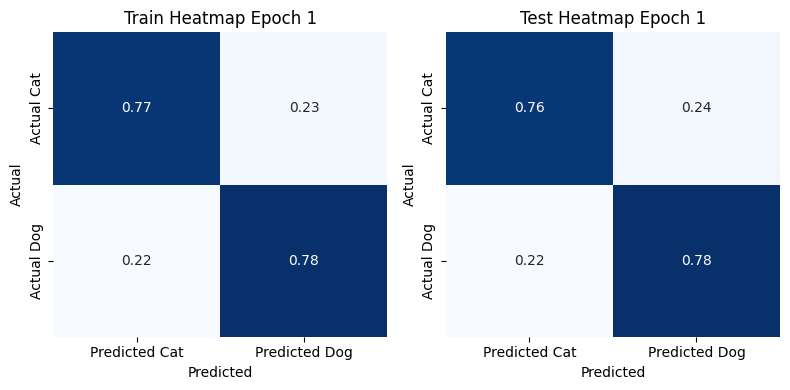

Epoch 2/10: Train loss = 0.4853, Train accuracy = 0.7679, Test loss = 0.4991, Test accuracy = 0.7533


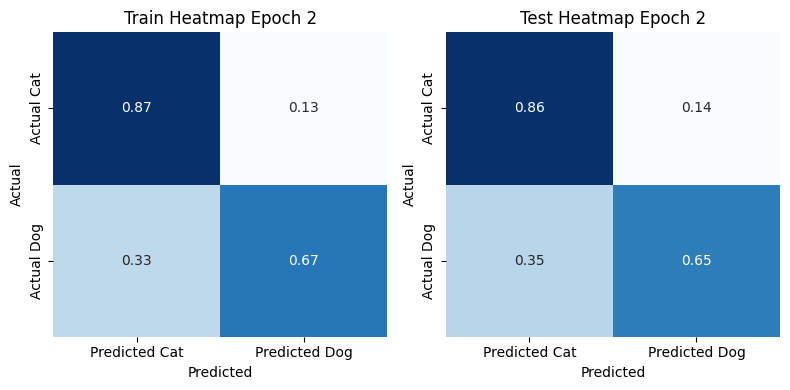

Epoch 3/10: Train loss = 0.4126, Train accuracy = 0.8125, Test loss = 0.4342, Test accuracy = 0.7924


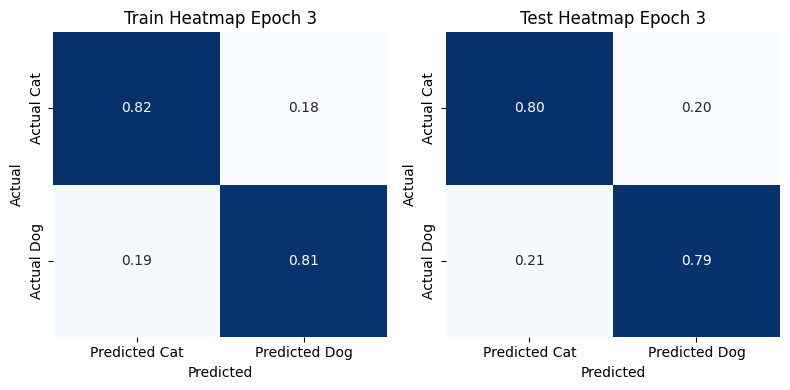

Epoch 4/10: Train loss = 0.4199, Train accuracy = 0.8063, Test loss = 0.4574, Test accuracy = 0.7963


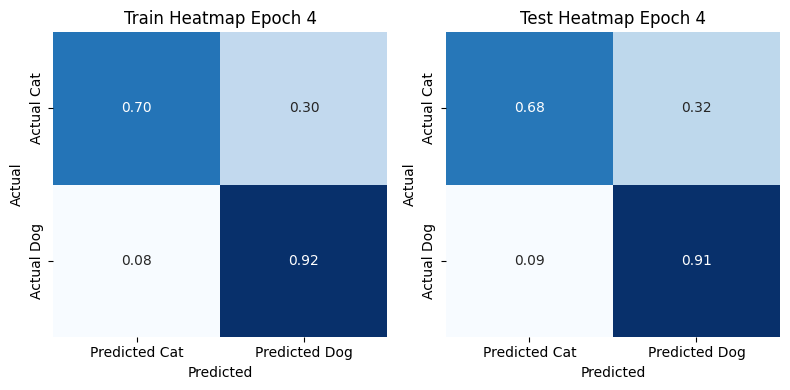

Epoch 5/10: Train loss = 0.3738, Train accuracy = 0.8334, Test loss = 0.4007, Test accuracy = 0.8181


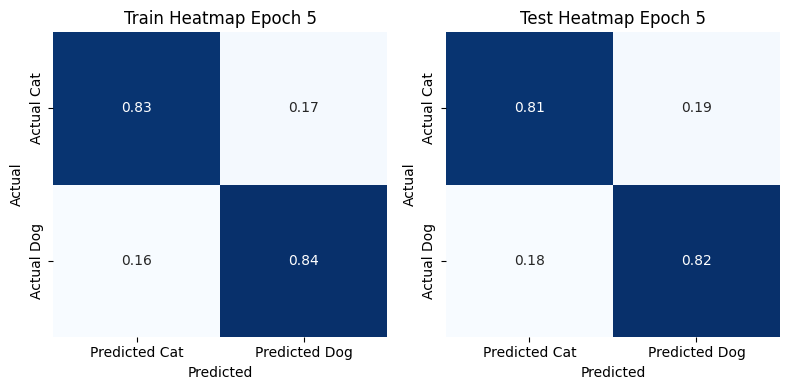

Epoch 6/10: Train loss = 0.3564, Train accuracy = 0.8406, Test loss = 0.3919, Test accuracy = 0.8235


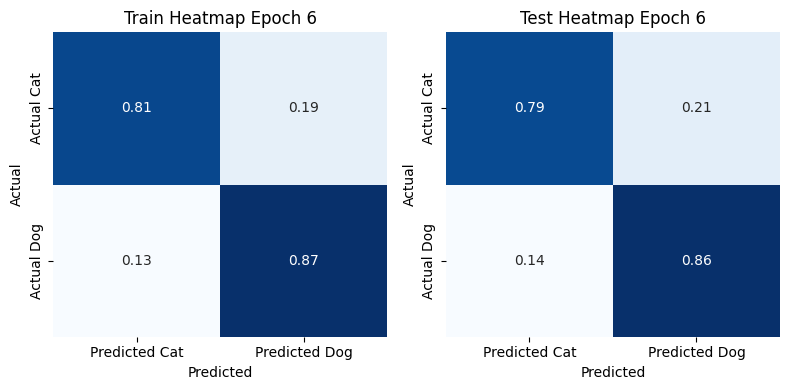

Epoch 7/10: Train loss = 0.3510, Train accuracy = 0.8455, Test loss = 0.3769, Test accuracy = 0.8303


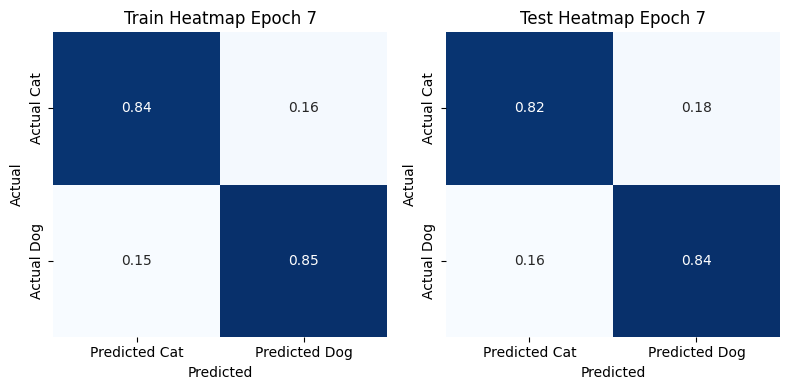

Epoch 8/10: Train loss = 0.3258, Train accuracy = 0.8586, Test loss = 0.3612, Test accuracy = 0.8385


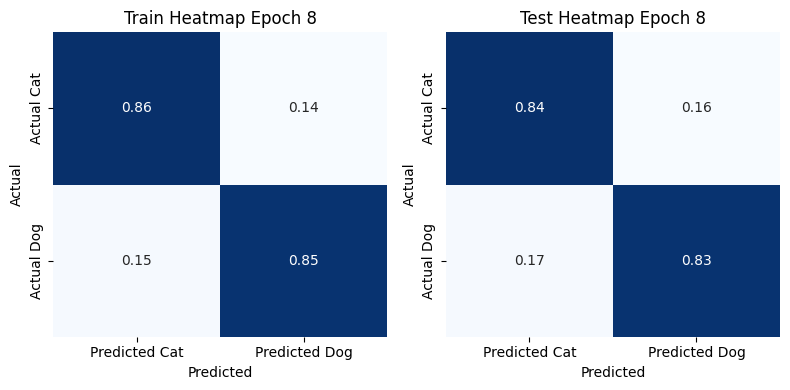

Epoch 9/10: Train loss = 0.3157, Train accuracy = 0.8630, Test loss = 0.3608, Test accuracy = 0.8404


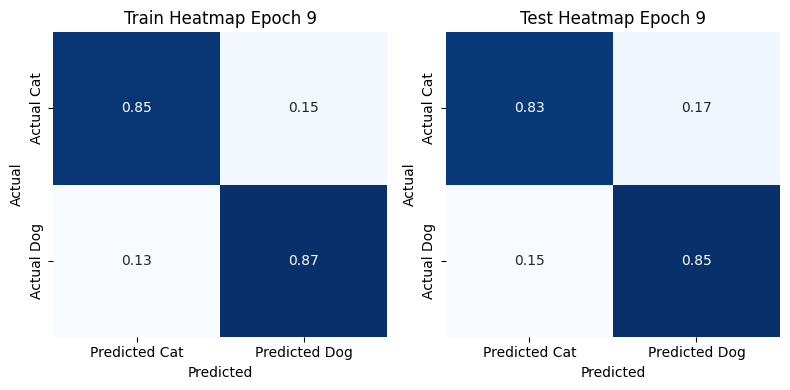

Epoch 10/10: Train loss = 0.3178, Train accuracy = 0.8628, Test loss = 0.3582, Test accuracy = 0.8427


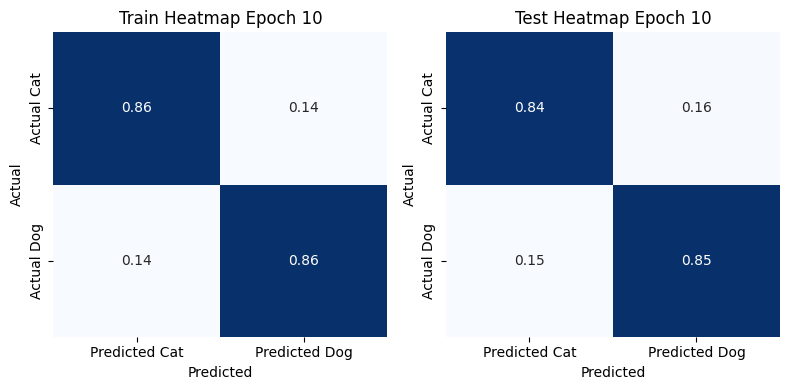

Training complete.


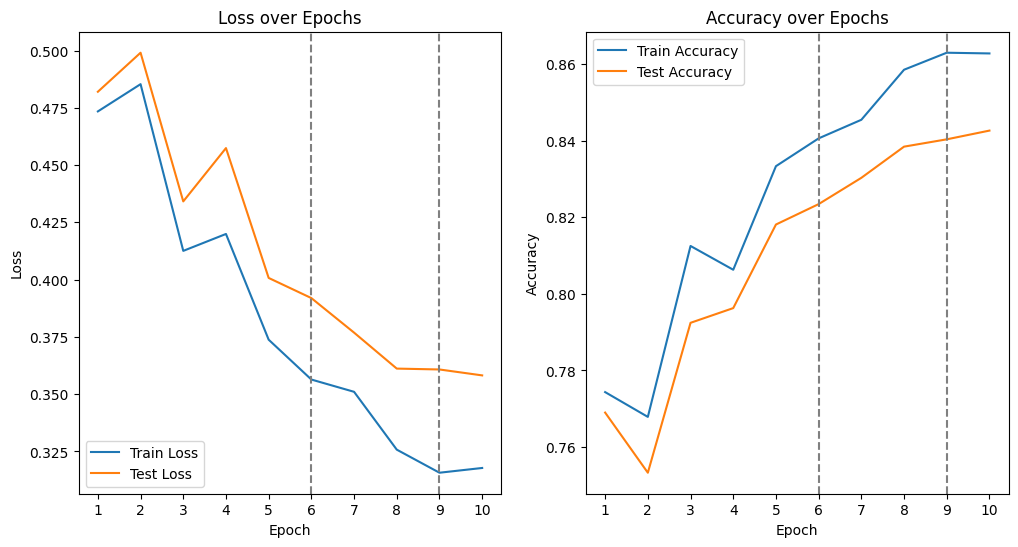

In [5]:
train(model17_0,"model_weights/model17_0.pt",criterion,train_dataset,test_dataset)